In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_blobs

In [224]:
x, y = make_blobs(n_samples = 1000, n_features=2, \
                  centers = 2, cluster_std=7)

In [225]:
x[:5]

array([[  9.41598708,  12.11592195],
       [  0.52127206, -12.74813852],
       [ 24.52589292,  16.89542932],
       [  7.8479181 ,   2.42126593],
       [-10.60351393,   2.4037232 ]])

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train, x_test, y_train, y_test = \
train_test_split(x,y,test_size=0.3,random_state=111)

In [228]:
from sklearn.svm import SVC

In [229]:
svc = SVC()

In [230]:
svc.fit(x_train, y_train)

C:\Users\102-09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [231]:
from sklearn.metrics import roc_curve

In [233]:
fpr,tpr,thresholds =roc_curve(y_test, svc.decision_function(x_test))

In [234]:
# fpr : false positive rate (실제는 N인데 P라고 잘못 예측한 비율)
# tpr : true positive rate (실제 P인데 P라고 잘 예측한 비율)
# thresholds : 임계값 (P와 N를 나누는 기준값)..

C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


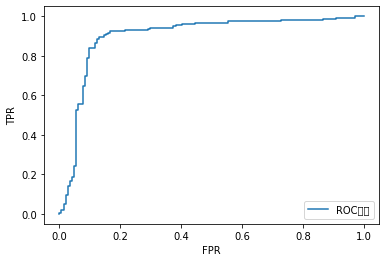

In [235]:
plt.plot(fpr, tpr, label='ROC곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc=4)

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
rfc = RandomForestClassifier(n_estimators = 500)

In [238]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [239]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve\
(y_test, rfc.predict_proba(x_test)[:,1])

C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\102-09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


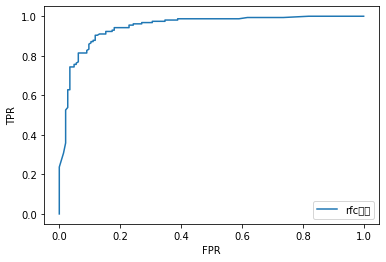

In [240]:
plt.plot(rf_fpr, rf_tpr, label='rfc곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc=4)

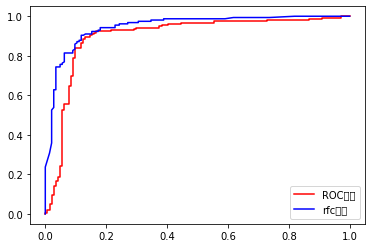

In [241]:
plt.plot(fpr, tpr, label='ROC곡선', c='r')
plt.plot(rf_fpr, rf_tpr, label='rfc곡선', c='b')
plt.legend()
plt.show()

In [242]:
from sklearn.metrics import roc_auc_score
rfc_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(x_test))
print('rfc의 auc :', rfc_auc)
print('svc의 auc :', svc_auc)

rfc의 auc : 0.9468928062678064
svc의 auc : 0.8984597578347578


In [243]:
### clustering

In [259]:
x, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, 
                 cluster_std=3, shuffle=True, random_state=77)

In [260]:
x[:5]

array([[  8.16044263,   2.36242588],
       [  7.74775399,   6.01184907],
       [  6.30430938,   0.03275582],
       [  7.18627771, -13.37505897],
       [  0.38604962,  -6.07685032]])

In [264]:
y[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 2, 0])

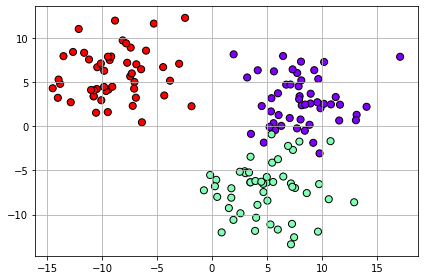

In [266]:
plt.scatter(x[:,0], x[:,1], c=y, \
            marker='o', edgecolor='black', s=50, cmap='rainbow')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
### clustering
# 1. Kmeans - center points
# 2. Hierachical
# 3. DBSCAN

In [267]:
from sklearn.cluster import KMeans

In [285]:
km = KMeans(n_clusters=3,
         init='random',
         n_init= 10,
         max_iter=300,
         tol=1e-04,
         random_state=0)

y_km = km.fit_predict(x)

In [286]:
y_km

array([1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0,
       1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0])

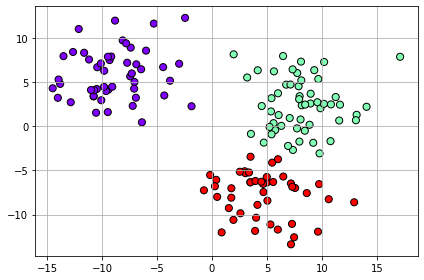

In [287]:
plt.scatter(x[:,0], x[:,1], c=y_km, \
            marker='o', edgecolor='black', s=50, cmap='rainbow')
plt.grid()
plt.tight_layout()
plt.show()

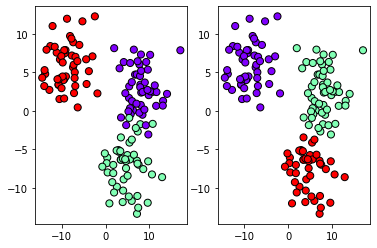

In [288]:
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.scatter(x[:,0], x[:,1], c=y, \
            marker='o', edgecolor='black', s=50, cmap='rainbow')
ax1.scatter(x[:,0], x[:,1], c=y_km, \
            marker='o', edgecolor='black', s=50, cmap='rainbow')

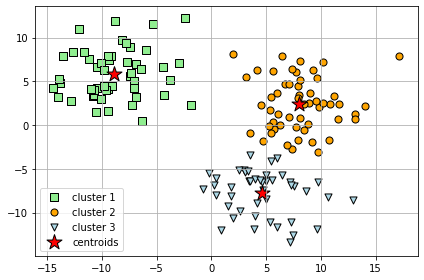

In [289]:
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [290]:
### 엘보우 방법

In [291]:
km.inertia_

2455.109492801439

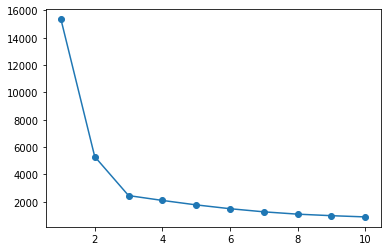

In [293]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter = 300,
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')

In [294]:
### silhouette

In [295]:
from sklearn.metrics import silhouette_samples

In [297]:
km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

In [298]:
y_km = km.fit_predict(x)

In [300]:
y_km[:10]

array([2, 2, 2, 0, 0, 2, 2, 0, 1, 2])

In [302]:
cluster_labels = np.unique(y_km)
cluster_labels

array([0, 1, 2])

In [303]:
cluster_labels.shape

(3,)

In [305]:
n_clusters = cluster_labels.shape[0]

In [307]:
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')

In [311]:
silhouette_vals[:20]

array([0.66842756, 0.65680038, 0.47428267, 0.56402605, 0.54525653,
       0.54673001, 0.50640501, 0.60968039, 0.73818175, 0.38494252,
       0.77861975, 0.67348043, 0.54417429, 0.5199187 , 0.64543577,
       0.75330995, 0.76197905, 0.56448278, 0.4828492 , 0.77652705])

In [308]:
np.mean(silhouette_vals)

0.5876885118263147

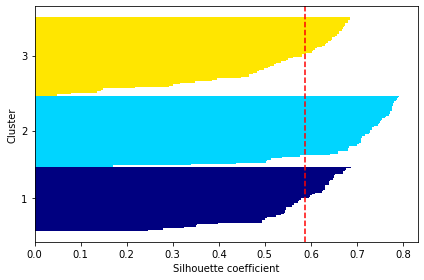

In [310]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

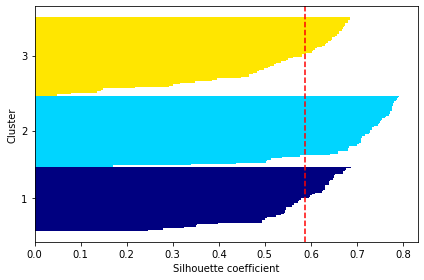

In [313]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

C:\Users\103-04\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\103-04\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\103-04\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. CRIM: 도시의 인당 범죄율
2. ZN: 25,000 평방 피트가 넘는 주택 비율
3. INDUS: 도시에서 소매 업종이 아닌 지역 비율
4. CHAS: 찰스강 인접 여부(강 주변=1, 그 외=0)
5. NOX: 일산화질소 농도(10ppm 당)
6. RM: 주택의 평균 방 개수
7. AGE: 1940년 이전에 지어진 자가 주택 비율
8. DIS: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
9. RAD: 방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX: $10,000당 재산세율     


11. PTRATIO: 도시의 학생-교사 비율          
12. B: 1000(Bk - 0.63)^2, 여기에서 Bk는 도시의 아프리카계 미국인 비율     
13. LSTAT: 저소득 계층의 비율           
14. MEDV: 자가 주택의 중간 가격($1,000 단위)               

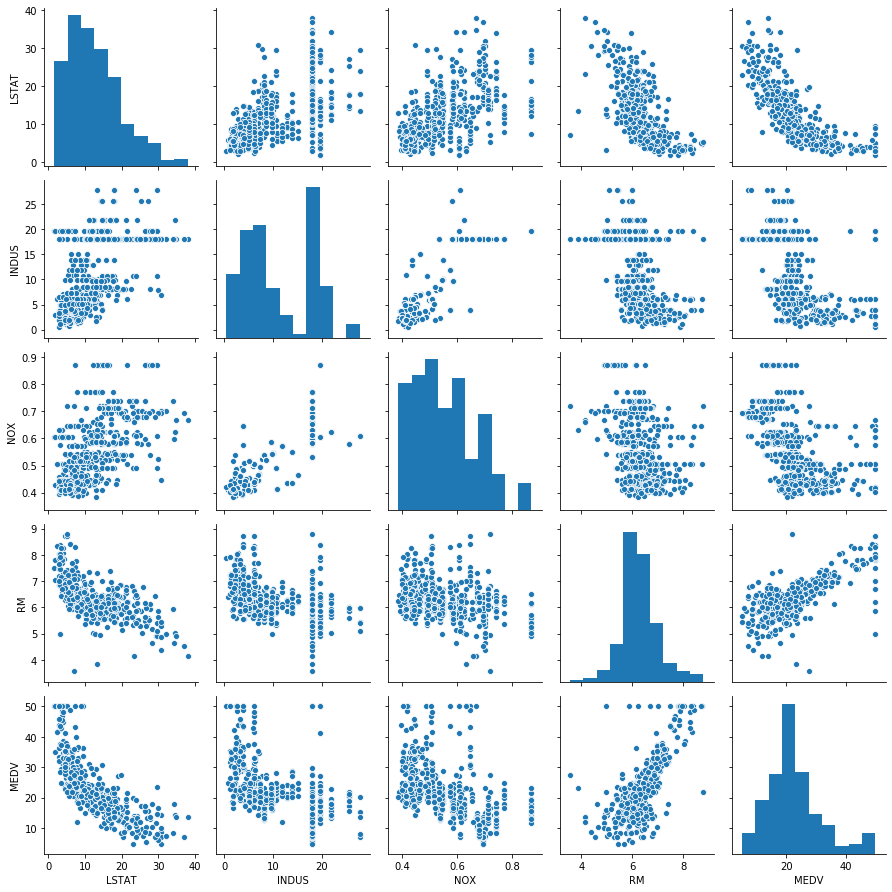

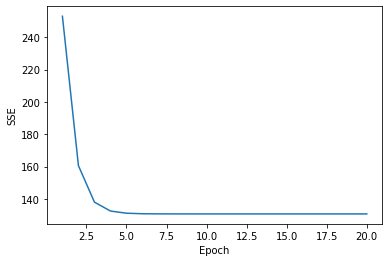

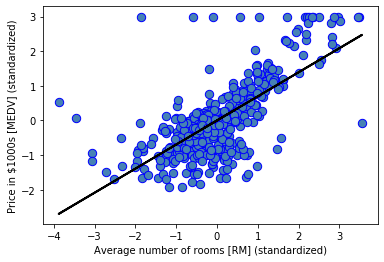

기울기: 0.695
절편: -0.000


array([10.83993289])

array([9.10210898])

-34.67062077643857

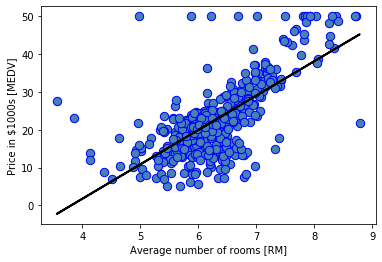